In [4]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests

### Exercise 1

Write a function that takes in the width and height and prints an image

Enter width: 200
Enter height: 100


width:200
height:100
address:http://www.placekitten.com/200/100


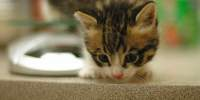

In [5]:
# Use input to request width/height and print an image
def p_image():
    a = input("Enter width:")
    b = input("Enter height:")
    print("width:"+str(a))
    print("height:"+str(b))
    address = "http://www.placekitten.com/"+ str(a) +"/" + str(b)
    print("address:"+address)
    r = requests.get(address)
    display(Image(r.content))

p_image()

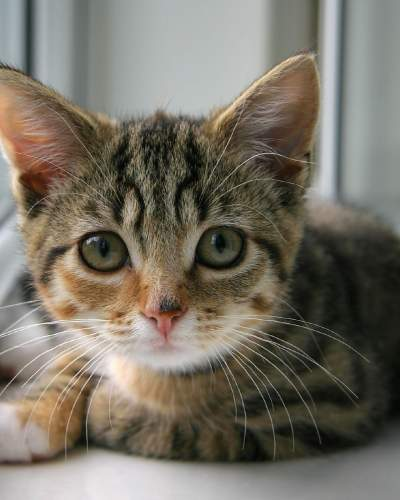

In [8]:
def printer1(width, height):
    try:
        int(width)
        int(height)
    except (SyntaxError, ValueError):
        print("Please enter the number in digits.")
    r = requests.get(f'http://www.placekitten.com/{width}/{height}')
    r.status_code
    if r.status_code != 200:
        print("404 Error, file not found.")
    return(display(Image(r.content)))

printer1(400, 500)

### Exercise 2

Can you write a loop to show several images?


How many images do you want?  3


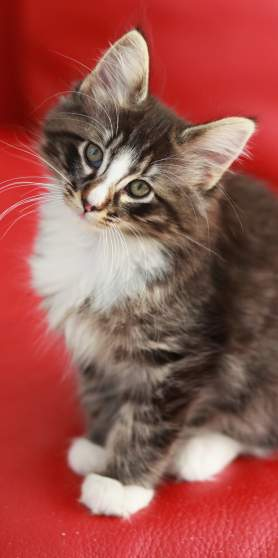

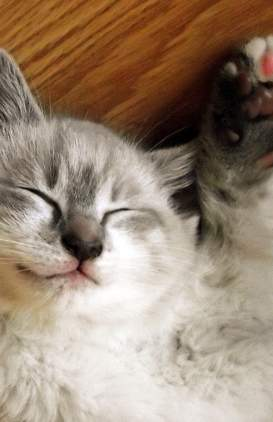

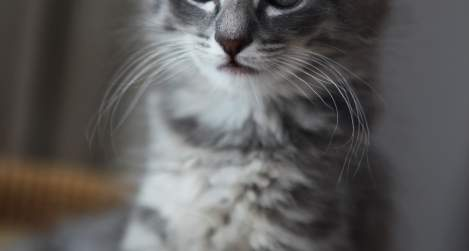

In [10]:
# Write a loop that shows multiple images
import random
images = input("How many images do you want? ")
for image in range(int(images)):
    URL = "http://www.placekitten.com/" + str(random.randrange(100, 600)) + "/" + str(random.randrange(100, 600))
    r = requests.get(URL)
    display(Image(r.content))

In [14]:
def image(width,height):
    x= str(width)
    y = str(height)
    address = "http://www.placekitten.com/"+ x +"/" + y
    r = requests.get(address)
    display(Image(r.content))
    

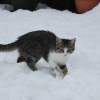

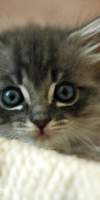

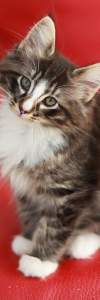

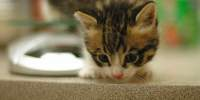

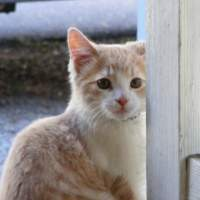

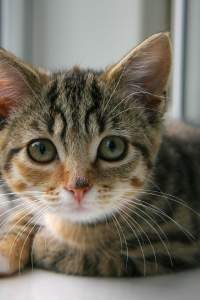

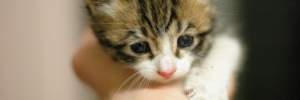

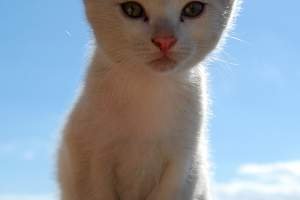

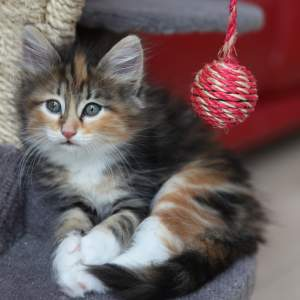

In [15]:
for w in [100,200,300]:
    for h in [100,200,300]:
        image(w,h)

### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [17]:
# Use the .json() function to get the response converted to a dictionary or list
# What did it return?
import json
r = requests.get("http://worldtimeapi.org/api/timezone")
son_data = r.json()
print(son_data)
type(son_data)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Algiers', 'Africa/Bissau', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/El_Aaiun', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Khartoum', 'Africa/Lagos', 'Africa/Maputo', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'America/Araguaina', 'America/Argentina/Buenos_Aires', 'America/Argentina/Catamarca', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/La_Rioja', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Salta', 'America/Argentina/San_Juan', 'America/Argentina/San_Luis', 'America/Argentina/Tucuman', 'America/Argentina/Ushuaia', 'America/Asuncion', 'America/Atikokan', 'America/Bahia', 'America/Bahia_Banderas', 'America/Barbados', 'America/Belem', 'America/Belize', 'America/Blanc-Sablon', 'America/Boa_Vista', 'America/Bogota', 'America/Boise', 'Amer

list

### Exercise 4

Get the time for your time zone

In [38]:
# Your code here
import json

def time(area, location, region):
    local_time = requests.get(f'http://worldtimeapi.org/api/timezone/{area}/{location}/{region}')
    if local_time.status_code == 200:
        df = local_time.json()
    else:
        return None
    return(df['utc_datetime'])

time('America', 'Indiana', 'Indianapolis')


'2021-05-26T18:01:31.595168+00:00'

### Exercise 5

Get the time for your IP address

In [47]:
# Get the time for your IP address
time_ip = requests.get("http://worldtimeapi.org/api/ip/")
time_ip.raise_for_status()

time_dict = time_ip.json()

print(time_dict['utc_datetime'])

HTTPError: 503 Server Error: Service Unavailable for url: http://worldtimeapi.org/api/ip/

In [49]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params=params)
    #print(r.json())
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for page in content:
        result.append(page['title'])
    return result

## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of all of the users who have ever edited the most recently edited Wikipedia page.

In [55]:
## Your code here

page = get_last_pages_changed(1)

def get_editors():
    parm ={'action':'query',
    'format':'json',
    'prop':'contributors',
    'titles':page[0]} # page links back to the defined most recently edited page as above.

    r = requests.get(endpt,parm)
    all_content = r.json()['query']['pages']
    page_id = list(all_content.keys())[0]
    contr = all_content[page_id]["contributors"] # narrowed to just the contributor list with user ids and names

    #print(contr)
    editors = []
    for item in contr: # get each dictionary pair out of the list, then need to grab the value of the key name from the dictionaries
        editors.append(item["name"])
    #print(editors)

    return print(f"The most recent editors of the page {page} are {editors[:]}.") #is there a way to remove the [] from the printout? 
get_editors() 

The most recent editors of the page ['Mark Longwell'] are ['Frietjes', 'InternetArchiveBot', 'Cydebot', 'RussBot', 'BD2412', 'John of Reading', 'GoodDay', 'Yobot', 'Aboutmovies', 'KasparBot'].


In [56]:
endpt = 'https://en.wikipedia.org/w/api.php'

def get_last_users_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n,
          "rcprop": "user"
             }
    r = requests.get(endpt, params)
    result = []
    content = r.json()['query']['recentchanges']
    for r in content:
        result.append(r['user'])
    return result

In [58]:
get_last_users_changed(50)

['Ferret',
 '2600:6C58:767F:F747:5C45:EAE8:AB0E:17F2',
 'JesseRafe',
 'Serols',
 'Tbhotch',
 'Arjayay',
 'Johnpacklambert',
 '2409:4060:208A:C89F:DC0:C4D:64F2:88E7',
 'Lukflug',
 'Le Deluge',
 'Bakir123',
 'Prestonclark1414141',
 'Love of Corey',
 'TheSokks',
 'WikiCleanerBot',
 'Kjell Knudde',
 'Sakiv',
 'Amigao',
 '199.67.203.142',
 '2601:5CA:C302:43D0:7031:CDC9:2028:2669',
 'Ab207',
 'BSMRD',
 '62.7.226.235',
 '75.118.102.245',
 'TheSokks',
 '2A02:C7F:BCCF:3100:C01:1817:75BC:BDC',
 'M.Bitton',
 '149.255.198.16',
 '24.184.206.54',
 '100.11.207.98',
 'Asqueladd',
 'Red Director',
 'Lieutcoluseng',
 'WikiCleanerBot',
 'MA Javadi',
 '111.184.28.146',
 'Alphalfalfa',
 'RoySmith',
 'Red Director',
 'Extraordinary Writ',
 'Jon698',
 'Saadrafiq4',
 'Muboshgu',
 '77.183.37.251',
 'Shoot for the Stars',
 'Tbhotch',
 'Red Director',
 'Rcpilot9',
 'Ritenhouse',
 'John B123']

In [59]:
def get_user_changed(n):
    params = {'action': 'query',
          'list': 'allrevisions',
          'arvprop': 'user',
          'rcnamespace': '0',
          'format': 'json',
          'arvlimit': n}
    r = requests.get(endpt, params)
    #print(r.json()['query']['allrevisions'])
    result = []
    content = r.json()['query']['allrevisions']
    for r in content:
        result.append(r['revisions'][0])
    return result

get_user_changed(20)

[{'user': 'Kaashmychecksfanpage'},
 {'user': 'Uranium Site'},
 {'user': 'EN-Jungwon'},
 {'user': 'Eddie891'},
 {'user': 'BadgerPriest'},
 {'user': '182.69.78.3', 'anon': ''},
 {'user': 'Red Director'},
 {'user': 'BadgerPriest'},
 {'user': 'Wallyfromdilbert'},
 {'user': 'BadgerPriest'},
 {'user': 'PlanespotterA320'},
 {'user': 'BadgerPriest'},
 {'user': 'ArchivesandLetters'},
 {'user': '86.42.192.158', 'anon': ''},
 {'user': 'ChainChomp2'},
 {'user': 'Sadenar40000'},
 {'user': 'Erick Soares3'},
 {'user': 'Lutesque'},
 {'user': 'Missvain'},
 {'user': 'Chiswick Chap'}]

In [61]:
import tweepy

from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# We then create an api object, based on the auth object created with your credentials
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
class StreamListener(tweepy.StreamListener):
    def on_status(self, tweet):
        print(tweet.author.screen_name + "\t" + tweet.text)

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['Purdue', '"data science"']
streamer.filter(track = keywords)

# Exercises


1. Use the streaming API to produce a list of 1000 tweets about a topic.

In [90]:
class StreamListener(tweepy.StreamListener):

    def __init__(self, num_tweets):
        self.counter = 0
        self.num_tweets = num_tweets
        self.tweets = []
        super().__init__()
    
    def on_status(self, tweet):
        self.tweets.append(tweet)
        self.counter += 1
        if self.counter >= self.num_tweets:
            return False

        return True

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener(200)
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['happy']
streamer.filter(track = keywords)

for tweet in l.tweets:
    print(tweet.text)

@kandibint Happy birthday Kandi.
@andy_sell Look, at least he's happy to be there.
RT @Maems: I commissioned @ettinger_avoca to recreate this frame with #FRobin and I am so over the moon happy with how it turned out! 💖💕💖💕💖…
I'm pretty happy that Murderbot is getting therapy (even if it has not realised that's what's happening!)
@thespursweb Don't know if i should be happy or scared
RT @zenoviea: PEOPLE. ARE. GOING. TO. TALK. BADLY. ABOUT. YOU. NO. MATTER. WHAT. SO. JUST. DO. WHAT. MAKES. YOU. HAPPY.
RT @UndercoverIndi: Please join me here at @UndercoverIndi in wishing the one and only Verden Allen (Organist/Founding member of Mott The H…
HAPPY BIRTHDAY TO THE BAT PACK! May 26 &amp; May 27. Peter Cushing (May 26), Vincent Price, and Sir Christopher Lee (bo… https://t.co/TI3HG6awst
RT @janjanjan: Happy BIRTHDAY to my Gemini sister, my love, my angel, @omgheyrose !! I’m so proud of you and everything you’re continuing t…
RT @_rickilynne_: There’s two types of people right now. The ones wi

2. From that list of 1000 tweets, eliminate retweets.

In [79]:
public_tweets = tweepy.Cursor(api.search, '"covid" -filter:retweets', count=200, tweet_mode='extended').items(1000)

squid_list = []
for tweet in public_tweets:
    if not tweet.retweeted:
        squid_list.append(tweet)

len(squid_list)

1000

In [77]:
squid_list[0].retweeted

False

In [72]:
public_tweets = api.search("#academictwitter", count=1000,  tweet_mode ='extended_tweet')
for tweet in public_tweets:
    #remove retweets
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.text)

chrisjunium	2021-05-26 18:50:56	It's totally messed up that I start to get worried when I haven't received an email in over an hour. #AcademicChatter #AcademicTwitter
waynegears	2021-05-26 18:46:07	“…Departments that strategically design their faculty workload systems, and put in place mechanisms to foster workl… https://t.co/s4UjhsmC2u
Dr_Meming	2021-05-26 18:45:51	Omfg what 😂 

@OpenAcademics @AcademicChatter #academictwitter #phdchat #phdvoice #phdfriend https://t.co/rktAVzcqgG
SCIEXnews	2021-05-26 18:45:08	What do YOU think? #TeamMassSpec #AcademicTwitter #STEMeducation https://t.co/vNDNBeuUpU
BiocordNetwork	2021-05-26 18:38:39	Happy #Wednesday! For today’s #career corner, we would love to know: what was the best piece of #AdviceForSuccess y… https://t.co/WWqqkPYlkU
WesFarrell	2021-05-26 18:36:37	Some days, going to the office isn’t so bad. #academicchatter #academictwitter #blueangels #USNA2021 @NavalAcademy… https://t.co/r8IMZzIB8x
scra	2021-05-26 18:35:13	Our student scholarship

4. For each original tweet, create a dictionary with the number of times you see it retweeted in your dataset.

5. Get a list of the URLs in your dataset

6. Now, see if you can figure out how to eliminate retweets in the query instead.

7. Get the last 50 tweets from West Lafayette, using the search API. (Hint - look up the geocode information [here]

(https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets)).

8. Alter the streaming algorithm to include a "locations" filter to get tweets from New York City. You need to use the order sw_lng, sw_lat, ne_lng, ne_lat for the four coordinates instead of a radius as in the search API.

### BONUS Questions
1. For each of your followers, get *their* followers (investigate time.sleep to throttle your computation)

2. Identify the follower you have that also follows the most of your followers.

3. How many users follow you but none of your followers?